<a href="https://colab.research.google.com/github/Zann181/Parcial-2_SyS/blob/main/Documentacion_Parcial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 2 - Señales y Sistemas 2022 - 2


##Dashboard con Streamlit y Ngrok

- Manipulación

In [ ]:
!pip install streamlit -q #instalación de librerías
!pip install pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.3 MB/s eta 0:00:00


In [ ]:
%%writefile detector.py

import streamlit as st
import matplotlib.pyplot as plt
import numpy as np

# Título del dashboard
st.title("Dashboard de Diagramas")

# Explicación de la señal
st.markdown("## Visualización de la señal $x(t) = |A \sin(2\pi F_o t)|^2$")
st.markdown("### Parámetros")
A = st.slider('Seleccione el valor de A', min_value=1, max_value=10, value=8)
Fo = st.slider('Seleccione el valor de $F_o$', min_value=1, max_value=10, value=1)

# Generar los datos de la señal
T = 1 / Fo
t = np.linspace(-1/(2*Fo), 1/(2*Fo), 1000)
x = A**2 * np.sin(2 * np.pi * Fo * t)**2

# Graficar la señal
fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('t')
ax.set_ylabel('$x(t)$')
ax.set_title('$x(t) = |A \sin(2\pi F_o t)|^2$')
st.pyplot(fig)

# Agregar un mensaje al usuario
st.success("¡Visualización generada con éxito!")


Overwriting detector.py


In [ ]:
token = '2lLjflKgZ4XGMZq6zZIzplqqBpP_2gbRwVgQf6BQjXvHjygi2' #colocar aquí su token personal después de crear su cuenta con correo UNAL en Ngrok

In [ ]:
from pyngrok import ngrok

# Set authentication token (unique per user)
ngrok.set_auth_token(token)

# Start Streamlit server on a specific port
!nohup streamlit run detector.py --server.port 5011 &

# Start ngrok tunnel to expose the Streamlit server
ngrok_tunnel = ngrok.connect(addr='5011', proto='http', bind_tls=True)

# Print the URL of the ngrok tunnel
print(' * Tunnel URL:', ngrok_tunnel.public_url)

nohup: appending output to 'nohup.out'
 * Tunnel URL: https://346b-34-139-194-14.ngrok-free.app


### Espectro de Fourier de la señal $ x(t) = |A \sin(2\pi F_o t)|^2 $,  

Dado que la señal está definida en $ t \in \left[-\frac{1}{2F_o}, \frac{1}{2F_o}\right] $, con  $ A, F_o \in \mathbb{R^+} $:

# Análisis del espectro de Fourier para la señal
$$
 x(t) = |A \sin(2\pi F_o t)|^2
$$

para obtener su espectro de Fourier en las formas **exponencial** y **trigonométrica**.

## 1. Serie de Fourier exponencial

La serie de Fourier exponencial tiene la forma:

$$
\hat{x}(t) = \sum_{n=-\infty}^{\infty} c_n e^{j n \omega_o t}
$$

Donde los coeficientes $c_n$ se calculan como:

$$
c_n = \frac{1}{T} \int_{T} x(t) e^{-j n \omega_o t} dt
$$

### Parámetros identificados:

- El **periodo**  $T = \frac{1}{F_o}$
- La **frecuencia angular fundamental** es  $\omega_o = 2\pi F_o$

### Reescritura de la señal:

Dado que $ x(t) = A^2 \sin^2(2\pi F_o t) $, aplicamos la identidad trigonométrica $ \sin^2(\theta) = \frac{1 - \cos(2\theta)}{2} $, obteniendo:

$$
x(t) = A^2 \frac{1 - \cos(4\pi F_o t)}{2}
$$

Esta forma tiene una componente continua (DC) y una componente oscilante a $4\pi F_o$.

### Cálculo de los coeficientes  $ c_n $

Sustituimos esta expresión de $ x(t) $ en la fórmula para $ c_n $ :

$$
c_n = \frac{A^2 F_o}{2} \left[ \int_{-\frac{1}{2F_o}}^{\frac{1}{2F_o}} e^{-j n 2\pi F_o t} dt - \int_{-\frac{1}{2F_o}}^{\frac{1}{2F_o}} \cos(4 \pi F_o t) e^{-j n 2\pi F_o t} dt \right]
$$

#### Primera integral:

Para $n \neq 0$, tenemos:

$$
\int_{-\frac{1}{2F_o}}^{\frac{1}{2F_o}} e^{-j n 2\pi F_o t} dt = 0
$$

Para $n = 0$:

$$
c_0 = \frac{A^2}{2}
$$

#### Segunda integral:

Para $ n = \pm 2 $, la integral resulta en:

$$
c_{\pm 2} = -\frac{A^2}{4}
$$

### Resultado final de los coeficientes $ c_n $ :

- $ c_0 = \frac{A^2}{2} $
- $ c_{\pm 2} = -\frac{A^2}{4}$
- $ c_n = 0 $ para otros valores de $ n $.

$$
c_n =
\begin{cases}
0 & \text{si } F_o = 0 \\
-\frac{A^2}{4F_o} & \text{si } n = -2 \text{ o } n = 2 \\
\frac{A^2}{2F_o} & \text{si } n = 0 \\
\frac{2iA^2}{-2\pi F_o n^3 e^{i\pi n} + 8\pi F_o n e^{i\pi n}} - \frac{2iA^2}{-2\pi F_o n^3 e^{-i\pi n} + 8\pi F_o n e^{-i\pi n}} & \text{en el resto de los casos}
\end{cases}
$$



##Para encontrar el **espectro de Fourier trigonométrico**

### Paso 1: Expansión de la señal

La señal dada es:

$$x(t) = |A \sin(2\pi F_o t)|^2$$

Utilizando la identidad trigonométrica para el cuadrado del seno:

$$\sin^2(\theta) = \frac{1 - \cos(2\theta)}{2}$$

Aplicamos esta identidad a $x(t)$:

$$x(t) = A^2 \sin^2(2\pi F_o t) = A^2 \frac{1 - \cos(4\pi F_o t)}{2}$$

Por lo tanto:

$$x(t) = \frac{A^2}{2} - \frac{A^2}{2} \cos(4\pi F_o t)$$

### Paso 2: Fórmula general de la serie de Fourier trigonométrica

La serie de Fourier trigonométrica tiene la forma:

$$x(t) = a_0 + \sum_{n=1}^{\infty} \left( a_n \cos(n \omega_o t) + b_n \sin(n \omega_o t) \right)$$

Donde $a_n$ y $b_n$ están dados por:

$$a_n = \frac{2}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}} x(t) \cos(n \omega_o t) \, dt$$

$$b_n = \frac{2}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}} x(t) \sin(n \omega_o t) \, dt$$

Donde el período $T = \frac{1}{F_o}$, y la frecuencia angular fundamental $\omega_o = 2\pi F_o$.

### Paso 3: Cálculo de $a_0$

El coeficiente $a_0$ representa el promedio de la señal en un periodo:

$$a_0 = \frac{1}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}} x(t) \, dt$$

Sustituyendo $x(t) = \frac{A^2}{2} - \frac{A^2}{2} \cos(4\pi F_o t)$:

$$a_0 = \frac{1}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}} \left( \frac{A^2}{2} - \frac{A^2}{2} \cos(4\pi F_o t) \right) dt$$

Resolvemos cada parte:

$\int_{-\frac{T}{2}}^{\frac{T}{2}} \frac{A^2}{2} dt = \frac{A^2}{2} T$

$\int_{-\frac{T}{2}}^{\frac{T}{2}} \frac{A^2}{2} \cos(4\pi F_o t) dt = 0 \, \text{(ya que el coseno tiene promedio cero en un período completo)}$

Por lo tanto:

$$a_0 = \frac{1}{T} \cdot \frac{A^2}{2} T = \frac{A^2}{2}$$

### Paso 4: Cálculo de $a_n$ para $n > 0$

El coeficiente $a_n$ es:

$$a_n = \frac{2}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}} x(t) \cos(n \omega_o t) \, dt$$

Sustituyendo $x(t) = \frac{A^2}{2} - \frac{A^2}{2} \cos(4\pi F_o t)$:

$$a_n = \frac{2}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}} \left( \frac{A^2}{2} - \frac{A^2}{2} \cos(4\pi F_o t) \right) \cos(n \omega_o t) \, dt$$

Se resuelven las integrales para diferentes valores de $n$:

- Para $n = 2$, el término $\cos(4\pi F_o t)$ coincide con la frecuencia $2\omega_o$, y obtendremos un valor diferente de cero.
- Para otros valores de $n$, las integrales se anulan.

Después de resolver, obtenemos:

$$a_2 = -\frac{A^2}{2}, \quad a_n = 0 \, (\text{para } n \neq 2)$$

### Paso 5: Cálculo de $b_n$

Dado que la señal es par, $b_n = 0$ para todos los valores de $n$.


### Simetría de la señal

La señal $x(t) = |A \sin(2\pi F_o t)|^2$ es **par** debido a que:

$$
x(-t) = |A \sin(-2\pi F_o t)|^2 = |A (-\sin(2\pi F_o t))|^2 = |A \sin(2\pi F_o t)|^2 = x(t)
$$

Entonces, $x(t) = x(-t)$, lo que indica que la señal es par. Dado que la señal es par, podemos deducir que los coeficientes $b_n = 0$ para todos los $n$, y la serie de Fourier trigonométrica solo contendrá términos de coseno.

### Serie trigonométrica compacta

La serie trigonométrica compacta nos permite expresar la señal en una forma más concisa utilizando funciones coseno desfasadas. Esta forma es útil cuando la señal presenta simetría, como es el caso.

La serie trigonométrica compacta se representa como:

$$
\hat{x}(t) = \sum_{n=0}^{\infty} d_n \cos(n \omega_o t + \phi_n)
$$

#### Cálculo de $d_n$ y $\phi_n$

Para una señal que es par, la fase $\phi_n$ es cero, ya que no hay componentes de seno ($b_n = 0$):


$$
\phi_n = \tan^{-1}\left(\frac{-b_n}{a_n}\right) = 0 \quad \text{para todos los } n
$$

Los coeficientes $d_n$ están dados por:


$$
d_n = \sqrt{a_n^2 + b_n^2} = |a_n| \quad (\text{ya que } b_n = 0)
$$

Sabemos que:

- $a_0 = \frac{A^2}{2}$
- $a_2 = -\frac{A^2}{2}$

Por lo tanto:

- $d_0 = a_0 = \frac{A^2}{2}$
- $d_2 = |a_2| = \frac{A^2}{2}$

Para $n \neq 2$, $a_n = 0$, así que $d_n = 0$ para todos los $n$ diferentes de 0 y 2.

### Forma final de la serie trigonométrica compacta

Sustituyendo los valores de $d_n$ y $\phi_n$, obtenemos la serie trigonométrica compacta para $x(t)$:

$$
\hat{x}(t) = d_0 + d_2 \cos(2 \omega_o t + \phi_2)
$$

Dado que $\phi_2 = \pi$, la serie compacta se escribe como:

$$
\hat{x}(t) = \frac{A^2}{2} + \frac{A^2}{2} \cos(4\pi F_o t + \pi)
$$

Lo que simplifica a:

$$
\hat{x}(t) = \frac{A^2}{2} - \frac{A^2}{2} \cos(4\pi F_o t)
$$

### Implementación de la serie exponencial

Podemos pasar de la serie trigonométrica a la serie exponencial usando la relación entre los coeficientes $a_n$, $b_n$, y los coeficientes exponenciales $c_n$. Para $n \neq 0$:

$$
c_n = \frac{a_n - j b_n}{2}
$$

Como $b_n = 0$, se reduce a:

$$
c_n = \frac{a_n}{2}
$$

Por lo tanto, los coeficientes de la serie exponencial son:

$$
c_0 = a_0 = \frac{A^2}{2}
$$
$$
c_2 = \frac{a_2}{2} = -\frac{A^2}{4}
$$
$$
c_n = 0 \quad \text{para } n \neq 0, 2
$$

### Serie exponencial final

La serie exponencial de Fourier para $x(t)$ es:

$$
x(t) = c_0 + c_2 e^{j 4\pi F_o t} + c_{-2} e^{-j 4\pi F_o t}
$$

Dado que $c_{-2} = \overline{c_2}$, sustituimos los valores de $c_2$ y $c_{-2}$:

$$
x(t) = \frac{A^2}{2} - \frac{A^2}{4} \left(e^{j 4\pi F_o t} + e^{-j 4\pi F_o t}\right)
$$

Utilizando la identidad de Euler $e^{j\theta} + e^{-j\theta} = 2 \cos(\theta)$, obtenemos:

$$
x(t) = \frac{A^2}{2} - \frac{A^2}{2} \cos(4\pi F_o t)
$$


Este es el mismo resultado que obtuvimos usando la serie trigonométrica.

### Conclusión

Hemos obtenido el espectro de Fourier trigonométrico y exponencial de la señal $x(t)$, y la serie compacta final es:

$$
\hat{x}(t) = \frac{A^2}{2} - \frac{A^2}{2} \cos(4\pi F_o t)
$$




#Graficar la señal original
## $$ x(t) = |A \sin(2\pi F_o t)|^2 $$
$T = tf - ti = \frac{1}{2Fo}-(-\frac{1}{2Fo}) = \frac{1}{Fo}$

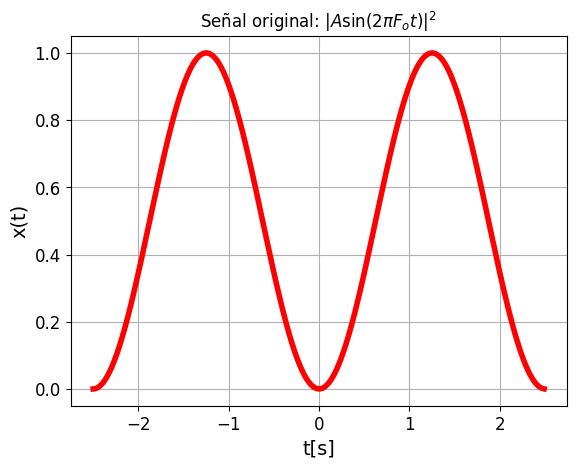

In [30]:
# Para graficar
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

A = 1 # amplitud de la señal
T = 5 # segundos de gráfica
Fs = 100 # frecuencia de muestreo definida
tv = np.arange(-T/2,T/2,1/Fs) #vector de tiempo generado
#Nm = len(tv) #numero de muestras requeridas

# Crear la señal cuadrada |A sin(2πF_o t)|^2 que cambia entre A^2 y 0
F_o = 1 / T


#tv = np.arange(-1/2*F_o,1/2*F_o,1/Fs) #vector de tiempo generado
Nm = len(tv) #numero de muestras requeridas

xo = A**2 * np.sin(2 * np.pi * F_o * tv)**2

# Definir la señal |A sin(2πF_o t)|^2
#xo = Abs(A * sin(2 * np.pi * F_o * tv))**2
#graficar señal original
plt.plot(tv,xo,'r',linewidth=4)
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)
plt.title("Señal original: $|A \sin(2\pi F_o t)|^2$")
plt.show()


In [31]:
phin.shape #tamaño matriz phin

NameError: name 'phin' is not defined

2. Realice las simulaciones respectivas para graficar el espectro de Fourier del ejercicio 1 (magnitud y fase como diagrama de
Bode en decibelios), y presente el error relativo y la senal reconstruida para  N = {${1, 2, . . . , 50}$}.

##2. Graficar el espectro de Fourier exponencial $c_n$


$$
c_n =
\begin{cases}
0 & \text{si } F_o = 0 \\
-\frac{A^2}{4F_o} & \text{si } n = -2 \text{ o } n = 2 \\
\frac{A^2}{2F_o} & \text{si } n = 0 \\
\frac{2iA^2}{-2\pi F_o n^3 e^{i\pi n} + 8\pi F_o n e^{i\pi n}} - \frac{2iA^2}{-2\pi F_o n^3 e^{-i\pi n} + 8\pi F_o n e^{-i\pi n}} & \text{en el resto de los casos}
\end{cases}
$$

In [ ]:
N = 50 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((Nm,2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

In [ ]:
A = 1  # amplitud de la señal
#N = 10 # número de armónicos (puedes ajustarlo)
Cn = np.zeros(2 * N + 1, dtype=np.complex_) # inicializar el espectro
nv = np.linspace(-N, N, 2 * N + 1) # vector de índices de armónicos

# Asignar el coeficiente DC (C_0)
Cn[N] = A**2 / 2  # C_0

# Asignar los coeficientes C_2 y C_-2
Cn[N + 2] = -A**2 / 4  # C_2
Cn[N - 2] = -A**2 / 4  # C_-2

# Los otros coeficientes son 0, así que no necesitas cambiarlos
#Cn[N] = 0 # nivel dc C_0

In [ ]:
# graficar bases
from ipywidgets import interact,IntSlider
fig, ax = plt.subplots(1, 1,figsize=(6,3))
def pltbase(n=1):

    plt.plot(tv,np.real(phin[:,int(n+N)]),label="Re{$\phi_n$(t)}")
    plt.xlabel("t[s]",fontsize = 14)
    plt.ylabel("$\phi_n$(t)",fontsize = 14)
    plt.plot(tv,np.imag(phin[:,int(n+N)]),label="Im{$\phi_n$(t)}")
    plt.grid()
    plt.plot(tv,xo,'r',linewidth=4,label='$x(t)$')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.gcf().set_figwidth(6)
    plt.gcf().set_figheight(3)
    plt.show()
    return
interact(pltbase,n=(-N,N,1))

interactive(children=(IntSlider(value=1, description='n', max=50, min=-50), Output()), _dom_classes=('widget-i…

<function __main__.pltbase(n=1)>

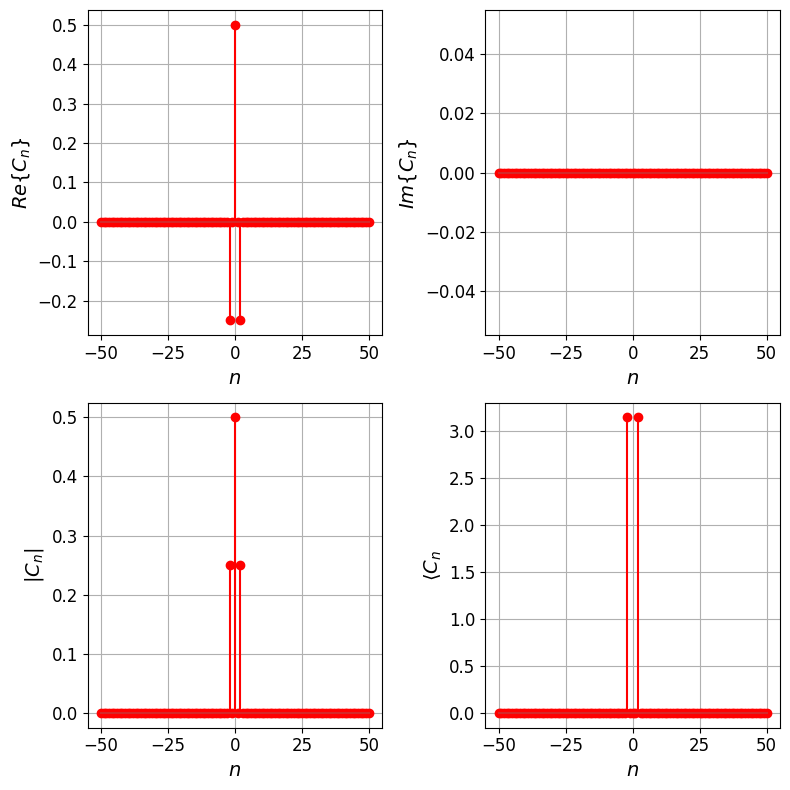

In [ ]:
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'r')#magnitud del espectro
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r')#fase del espectro
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()



### Paso 6: Error Relativo

El error relativo de reconstrucción considerando $N$ armónicos es:

$E_r[\%] = \left[ 1 - \frac{\sum_{n=-N}^{N} |c_n|^2}{P_x} \right] \times 100\%$

Para $N = 2$, los coeficientes no nulos son $c_0$, $c_2$, y $c_{-2}$:

$E_r[\%] = \left[ 1 - \frac{|c_0|^2 + |c_2|^2 + |c_{-2}|^2}{P_x} \right] \times 100\%$

Sustituyendo los valores:

$E_r[\%] = \left[ 1 - \frac{\left(\frac{A^2}{2}\right)^2 + \left(-\frac{A^2}{4}\right)^2 + \left(-\frac{A^2}{4}\right)^2}{\frac{A^4}{4}} \right] \times 100\%$

$E_r[\%] = \left[ 1 - \frac{\frac{A^4}{4} + 2 \cdot \frac{A^4}{16}}{\frac{A^4}{4}} \right] \times 100\%$

$E_r[\%] = \left[ 1 - \frac{3}{4} \right] \times 100\% = 25\%$

### Conclusión

El espectro de Fourier de la señal $x(t) = |A \sin(2\pi F_o t)|^2$ tiene los coeficientes $c_0 = \frac{A^2}{2}, c_2 = c_{-2} = -\frac{A^2}{4}$. La potencia total de la señal es $P_x = \frac{A^4}{4}$, y el error relativo de reconstrucción con $N = 2$ armónicos es $E_r = 25\%$.


In [ ]:
Px = A**2 # estimar según señal estudiada
def pltest(Na=1):
    ind = np.arange(N-Na,N+Na+1)
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(tv,xo,color='r',label='x(t)') #señal original
    plt.title('$E_r$=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return
interact(pltest,Na=(1,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=50, min=1), Output()), _dom_classes=('widget-in…

<function __main__.pltest(Na=1)>

## Pregunta 3 (2 puntos):

Sea la señal portadora $c(t) = A_c\sin(2\pi F_c t),$ con $A_c,F_c\in\mathbb{R},$ y la señal mensaje $m(t)\in\mathbb{R}$. Encuentre el espectro en frecuencia de la señal modulada en amplitud (AM), $y(t) = \left(1+\frac{m(t)}{A_c}\right)c(t)$. Luego, descargue desde youtube $5$ segundos de su canción favorita (capturando del segundo 20 al 25). Presente una simulación de modulación por amplitud AM (tomando como mensaje el fragmento de la canción escogida y con un índice de modulación de 0.5). Grafique las señales en tiempo y frecuencia (magnitud y fase) de la señal mensaje, portadora y modulada. Reproduzca los fragmentos de audio del mensaje, portadora y señal modulada. Nota: se sugiere utilizar un canal de señal de audio para el desarrollo del ejercicio.

Nota:
se sugiere utilizar un canal de senal de audio para el desarrollo del ejercicio. El usuario debe poder escoger eındice de
modulacion deseado.

## Solución:

La transformada de Fourier de la señal modulada se puede encontrar como:

$$Y(\omega) = \mathcal{F}\{y(t)\} = \mathcal{F}\left\{\left(1+\frac{m(t)}{A_c}\right)c(t)\right\}=\mathcal{F}\{c(t)\}+\frac{1}{A_c}\mathcal{F}\{m(t)c(t)\}$$

En este caso (utilizando tablas de Fourier):

$$C(\omega) = \mathcal{F}\{c(t)\} = \mathcal{F}\{A_c\sin(2\pi F_c t)\} = A_c\mathcal{F}\left\{\frac{e^{2\pi F_ct}-e^{-2\pi F_ct}}{2j}\right\}$$

y

$$\mathcal{F\{e^{\pm j\omega_0 t}\}} = 2\pi\delta(\omega \mp \omega_0)$$

Por consiguiente:

$$\boxed{C(\omega) = \frac{A_c\pi}{j}(\delta(\omega - 2\pi F_c)-\delta(\omega + 2\pi F_c))}$$

De forma similar:

$$\frac{1}{A_c}\mathcal{F}\{m(t)c(t)\} = \frac{1}{A_c}\mathcal{F}\{m(t)A_c\sin(2\pi F_c t)\} = \mathcal{F}\{m(t)\sin(2\pi F_c t)\} = \mathcal{F}\left\{\frac{m(t)e^{2\pi F_ct}-m(t)e^{-2\pi F_ct}}{2j}\right\}$$

teniendo en cuenta que:

$$\mathcal{F}\{x(t)e^{\pm j\omega_0t}\} = X(\omega \mp \omega_0)$$


Entonces:

$$\boxed{\frac{1}{A_c}\mathcal{F}\{m(t)c(t)\} = \frac{1}{2j}\left(M(\omega - 2\pi F_c)-M(\omega + 2\pi F_c)\right)}$$


Finalmente, el espectro de la señal modulada se puede escribir como:

$$\boxed{Y(\omega) = \frac{A_c\pi}{j}(\delta(\omega - 2\pi F_c)-\delta(\omega + 2\pi F_c)) + \frac{1}{2j}\left(M(\omega - 2\pi F_c)-M(\omega + 2\pi F_c)\right)}$$


In [ ]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz


  Using cached https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Brotli-1.1.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (5.5 kB)
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
  Using cached mutagen-1.47.0-py3-none-any.whl.metadata (1.7 kB)
  Using cached pycryptodomex-3.20.0-cp35-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached urllib3-2.2.2-py3-none-any.whl.metadata (6.4 kB)
  Using cached websockets-13.0.1-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
  Using cached charset_normalizer-3.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (33 kB)
  Using cach

In [ ]:

link="https://www.youtube.com/watch?v=aZiQ7aJ_BVo"
!yt-dlp --extract-audio -o "audio" --audio-format mp3 {link}

[youtube] Extracting URL: https://www.youtube.com/watch?v=aZiQ7aJ_BVo
[youtube] aZiQ7aJ_BVo: Downloading webpage
[youtube] aZiQ7aJ_BVo: Downloading ios player API JSON
[youtube] aZiQ7aJ_BVo: Downloading web creator player API JSON
[youtube] aZiQ7aJ_BVo: Downloading player 5f8f5b0f
[youtube] aZiQ7aJ_BVo: Downloading m3u8 information
[info] aZiQ7aJ_BVo: Downloading 1 format(s): 251
[download] Destination: audio
[download] 100% of    2.43MiB in 00:00:02 at 919.27KiB/s
[ExtractAudio] Destination: audio.mp3
Deleting original file audio (pass -k to keep)


In [ ]:
#convertir a .wav con ffmpeg para extraer audio en python
!ffmpeg -i audio.mp3 output.wav


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:

!pip install soundfile

In [ ]:
import soundfile as sf # para instalar pip install soundfile
from IPython.display import Audio #librería para reproducir audio
#leer archivo wav
nombre_out = "output.wav"
xa, fs = sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

Frecuencia de muestreo 48000.00[Hz]
audio output.wav


In [ ]:
xpro = xa.copy() #copiar archivos para procesar
#leer 5 segundos de la canción
ti = 20 #tiempo incio a procesar seg
tf = 25 #tiempo final a procesar seg
m = xpro[int(ti*fs):int((tf*fs)),0] #señal mensaje en primer canal

In [ ]:
#repoducir fragmento original #señal mensaje
Audio(m,rate=fs)

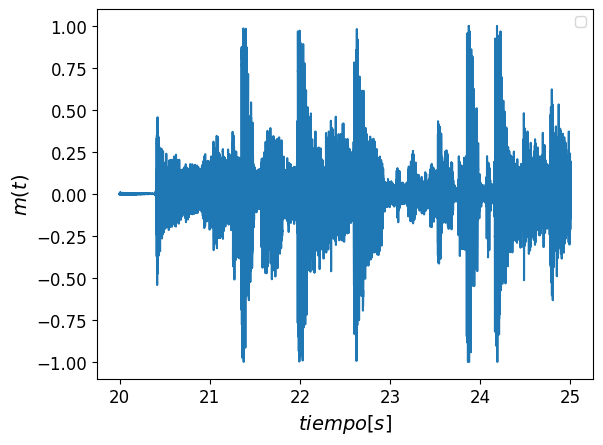

In [ ]:
#Señal mensaje en tiempo y frecuencia
tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,m) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$m(t)$')
plt.legend()
plt.show()

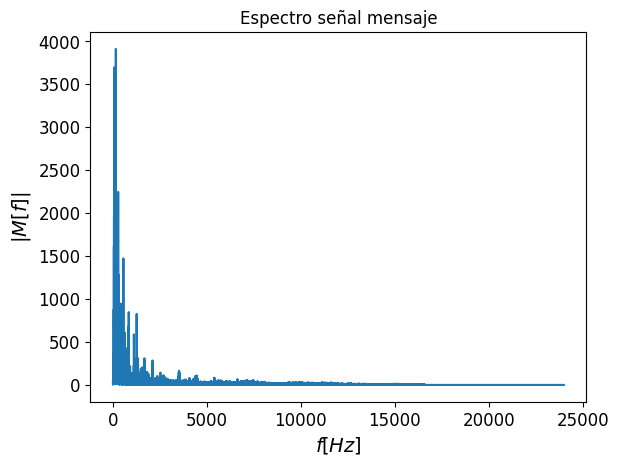

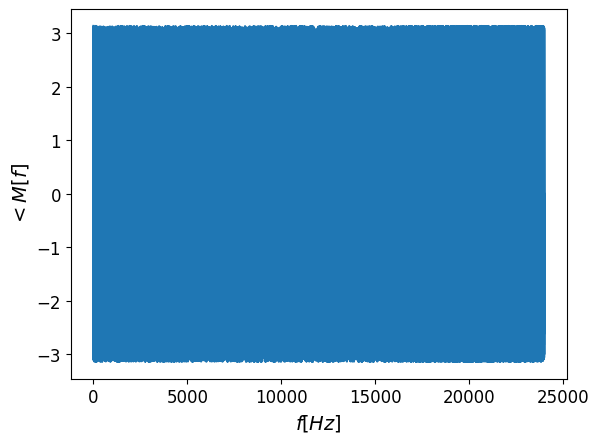

In [ ]:
#Fourier señal mensaje
Mw = np.fft.rfft(m) # axis=0 permite aplicar fft por cada columna de xpro
vf = np.fft.rfftfreq(m.shape[0],1/fs) #se crea el vector de frecuencias
plt.plot(vf,abs(Mw))#se grafica la magnitud
plt.title(r'Espectro señal mensaje')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M[f]|$',fontsize = 14)
plt.show()

plt.plot(vf, np.angle(Mw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<M[f]$',fontsize = 14)
plt.show()

Se fija una $F_c >> F_{max},$ para nuestro caso:

$$\boxed{F_c = 15000 [Hz]}$$

Además, teniendo en cuenta que el índice de modulación se define como:

$$ I_m = \frac{\max(|m(t)|)}{A_c}$$

In [ ]:
Fc = 15000 #frecuencia portadora
Im = 0.5 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im
Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.sin(2*np.pi*Fc*tt) #portadora

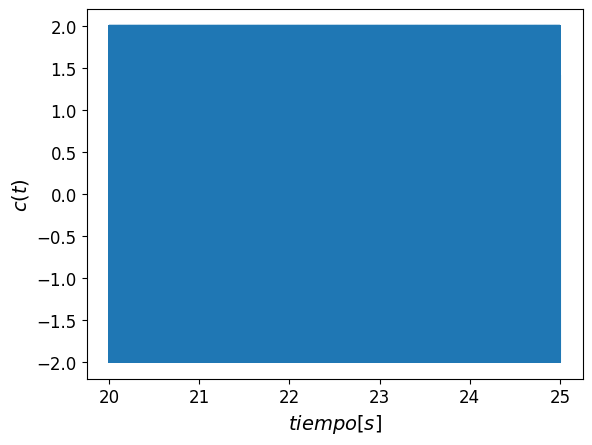

In [ ]:
#Señal portadora en tiempo y frecuencia
plt.plot(tt,c) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$c(t)$')
plt.show()

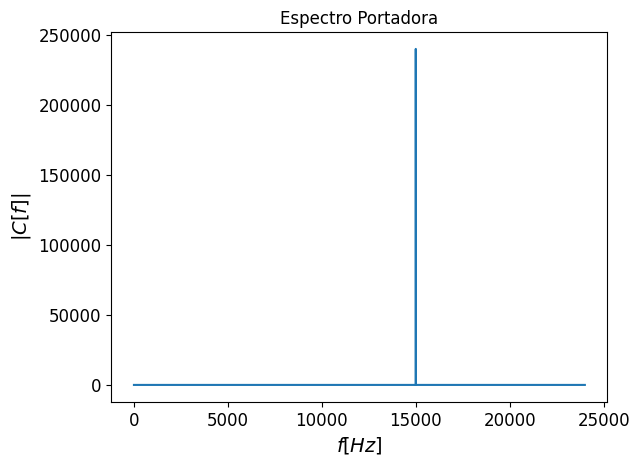

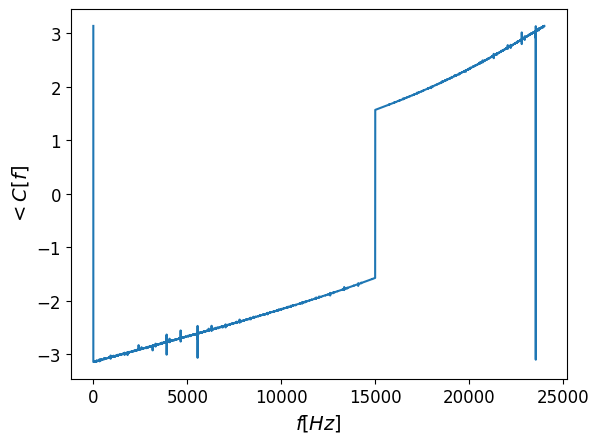

In [ ]:
#Fourier señal portadora
Cw = np.fft.rfft(c) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Cw))#se grafica la magnitud
plt.title(r'Espectro Portadora')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|C[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Cw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<C[f]$',fontsize = 14)
plt.show()

In [ ]:
#señal modulada
y = (1+m/Ac)*c #señal modulada en AM

In [ ]:
#repoducir modulada
Audio(y,rate=fs)

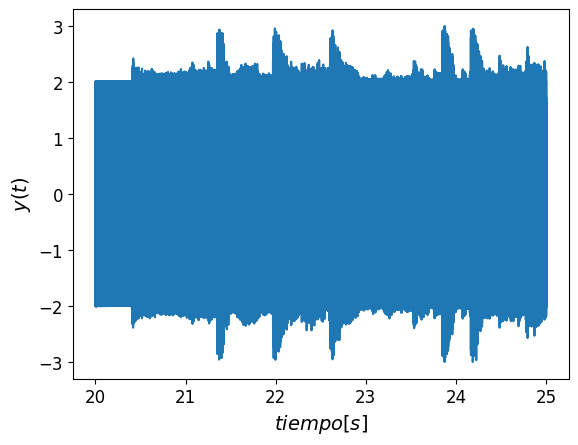

In [ ]:
plt.plot(tt,y) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$y(t)$')
plt.show()

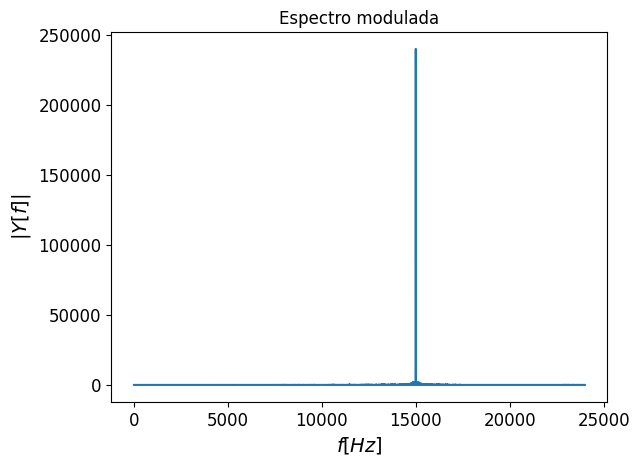

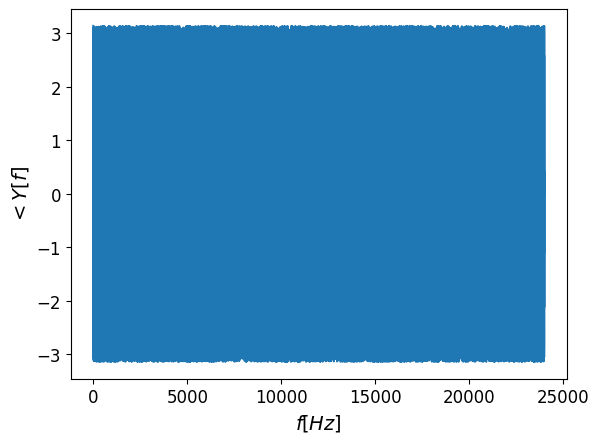

In [ ]:
#Fourier señal modulada
Yw = np.fft.rfft(y) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Yw))#se grafica la magnitud
plt.title(r'Espectro modulada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|Y[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Yw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<Y[f]$',fontsize = 14)
plt.show()

4. Consulte en que consiste la distorsión total de armónicos (Total Harmonic Distortion-(THD)) y el factor de potencia en un
circuito electrico. Como puede calcularse el THD desde la FFT?. Como puede calcularse la distorsion del factor de potencia
con base al THD?. Genere un ejemplo ilustrativo para el calculo del THD y la distorsion del factor de potencia para un
rectificador de onda completa con carga:
#i) netamente resistiva y carga RC en serie.
#ii) Establezca las condiciones necesarias
# para las simulaciones. El usuario podra escoger diferentes valores de R y C. Discuta los resultados obtenidos.

### Distorsión Total de Armónicos (THD) y Factor de Potencia en un Circuito Eléctrico

#### 1. **Total Harmonic Distortion (THD)**

La *Distorsión Total de Armónicos* (THD) es una métrica que mide cuánta energía de una señal eléctrica se encuentra en los armónicos en relación con la señal fundamental. En otras palabras, el THD nos dice qué tan distorsionada está una señal debido a la presencia de armónicos, que son múltiplos de la frecuencia fundamental de la señal.

El THD se puede calcular mediante la siguiente fórmula:

$$
THD = \frac{\sqrt{V_2^2 + V_3^2 + \dots + V_n^2}}{V_1}
$$

donde:
- $V_1$ es el valor eficaz (RMS) del componente fundamental de la señal.
- $V_2, V_3, \dots, V_n$ son los valores eficaces de los armónicos de mayor orden.

#### 2. **Factor de Potencia (PF) y su Relación con el THD**

El *Factor de Potencia* (PF) indica la eficiencia con la que la potencia eléctrica se convierte en trabajo útil. Para circuitos donde hay distorsión armónica, el factor de potencia se puede calcular en función del THD mediante la siguiente relación:

$$
PF = \frac{1}{\sqrt{1 + THD^2}}
$$

Un factor de potencia cercano a 1 indica una alta eficiencia, mientras que valores más bajos indican pérdidas significativas de energía debido a la distorsión armónica o desplazamientos de fase en la señal.

#### 3. **Cálculo del THD usando la FFT**

La *Transformada Rápida de Fourier* (FFT) es una herramienta que nos permite descomponer una señal periódica en sus componentes de frecuencia. Al realizar la FFT de una señal, podemos identificar el componente fundamental y los armónicos de mayor orden. Estos valores se usan para calcular el THD.

#### 4. **Simulación para el Cálculo del THD y el Factor de Potencia en un Rectificador de Onda Completa**

A continuación, se presentan dos simulaciones para un rectificador de onda completa con dos tipos de carga:

1. **Carga netamente resistiva**.
2. **Carga RC en serie**.

##### **Condiciones Iniciales para la Simulación:**
- Frecuencia de alimentación: $f_o = 60 \, \text{Hz}$
- Amplitud de la señal de entrada: $A = 120 \, \text{V}$
- El usuario puede escoger diferentes valores de $R$ y $C$.


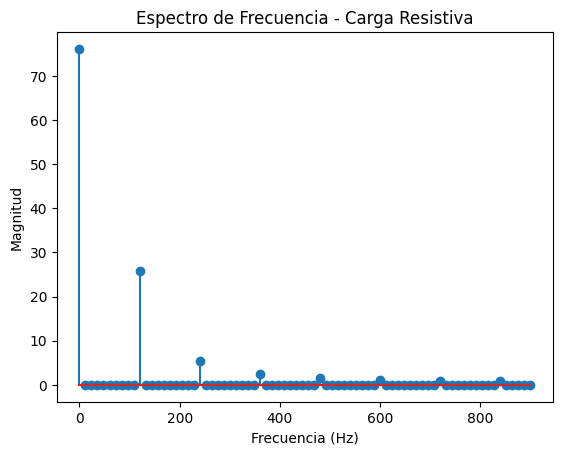

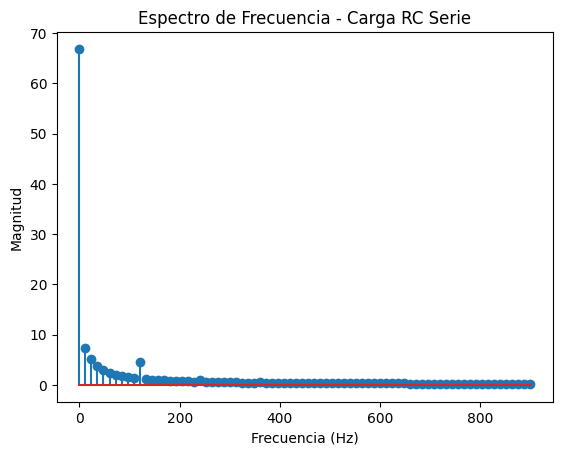

THD (Carga Resistiva) = 8857607598.44%
THD (Carga RC Serie) = 135.82%


In [2]:

##### **Código de Simulación:**

import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

# Parámetros de simulación
Fo = 60  # Frecuencia de alimentación en Hz
Fs = 30 * Fo  # Frecuencia de muestreo
To = 1 / Fo  # Periodo fundamental
Ts = 1 / Fs  # Periodo de muestreo
t = np.arange(0, 5 * To, Ts)  # Simulación de 5 periodos

A = 120  # Amplitud de la entrada

# Onda senoidal rectificada
in_o = A * np.abs(np.sin(2 * np.pi * Fo * t))  # Onda rectificada completa

# Función de transferencia del circuito RC serie
def transferencia_RC(R, C):
    num = [1]
    den = [R * C, 1]
    return sig.TransferFunction(num, den)

# Simulación para carga resistiva pura (RC -> R grande, C pequeño)
def simular_salida(R, C, in_o, t):
    G_n = transferencia_RC(R, C)
    _, out, _ = sig.lsim(G_n, in_o, t)
    return out

# Parámetros de simulación para los casos resistivo y RC serie
R_v_res = 1000  # Resistencia pura en ohmios
C_v_res = 1e-12  # Capacitancia mínima, casi nula para resistivo

R_v_RC = 1000  # Resistencia en ohmios para circuito RC
C_v_RC = 10e-6  # Capacitancia en faradios para circuito RC

# Simulación de salida para ambos casos
out_res = simular_salida(R_v_res, C_v_res, in_o, t)  # Carga resistiva
out_RC = simular_salida(R_v_RC, C_v_RC, in_o, t)  # Carga RC serie

# Espectro de frecuencia con FFT
def calcular_fft(signal, Ts):
    vfre = np.fft.rfftfreq(len(signal), Ts)  # Vector de frecuencias
    Xf = np.fft.rfft(signal)  # FFT de la señal
    return vfre, Xf

# Cálculo del espectro de ambas salidas
vfre_res, Xf_res = calcular_fft(out_res, Ts)
vfre_RC, Xf_RC = calcular_fft(out_RC, Ts)

# Gráfica del espectro de frecuencias para el caso resistivo
plt.stem(vfre_res, np.abs(Xf_res) / len(out_res))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Espectro de Frecuencia - Carga Resistiva')
plt.show()

# Gráfica del espectro de frecuencias para el caso RC serie
plt.stem(vfre_RC, np.abs(Xf_RC) / len(out_RC))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Espectro de Frecuencia - Carga RC Serie')
plt.show()

# Cálculo del THD
def calcular_thd(Xf):
    V1 = np.abs(Xf[1]) / len(Xf)  # Componente fundamental
    Vh = np.sqrt(np.sum(np.abs(Xf[2:])**2)) / len(Xf)  # Suma de los armónicos
    THD = Vh / V1
    return THD

# Cálculo del THD para ambas cargas
THD_res = calcular_thd(Xf_res)
THD_RC = calcular_thd(Xf_RC)

print(f'THD (Carga Resistiva) = {THD_res * 100:.2f}%')
print(f'THD (Carga RC Serie) = {THD_RC * 100:.2f}%')
